In [232]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt

In [233]:
df = pd.read_csv("_roads3.csv")
df.head()


,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing


In [234]:
#only road N1
df2 = df[df['road']=='N1'].copy()

In [235]:
#only bridge nodes
df3 = df2[df2['type']=="Bridge"].copy()

In [236]:
#note there are also types: Bridge / Bridge and Bridge / Culvert

df2['type'].unique()

array(['Others', 'Culvert', 'CrossRoad', 'KmPost', 'SideRoad,Right',
       'Bridge', 'SideRoad,Left', 'Others / Others', 'RailRoadCrossing',
       'CrossRoad / KmPost', 'Bridge / Bridge', 'KmPost / Culvert',
       'Bridge / Culvert', 'SideRoad,Right / SideRoad,Right',
       'KmPost / KmPost', 'Culvert / Culvert'], dtype=object)

In [237]:
df3.head()

,road,chainage,lrp,lat,lon,gap,type,name
14,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge
15,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end
26,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start
27,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end
36,N1,16.242,LRP016b,23.659111,90.569722,BS,Bridge,Langalbandhu bridge


In [238]:
len(df3)


315

In [239]:
%timeit df2['type'][0]
df2['type'][0]

The slowest run took 69.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.7 µs per loop


'Others'

In [240]:
#be aware of the pitfall of using chain assignments of the form df.loc[...][...] = value; 
#Here, Pandas evaluates df.loc[...] first, which may be a view or a copy.
%timeit df2.loc[0]['type']
df2.loc[0]['type']

10000 loops, best of 3: 142 µs per loop


'Others'

In [241]:
#if you make an assignment of the form df.loc[...] = value; then you can trust Pandas to alter df itself.

%timeit df2.loc[0, 'type']
df2.loc[0, 'type']

1000 loops, best of 3: 182 µs per loop


'Others'

In [242]:
%timeit df2.ix[0, 'type']
df2.ix[0, 'type']

The slowest run took 9.75 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.1 µs per loop


'Others'

In [243]:
df2.ix[0, 'type']= "Source"
df2.ix[ len(df2)-1, 'type'] = "Sink"


In [244]:
#check if the last value of type is "Sink"
df2.tail()

,road,chainage,lrp,lat,lon,gap,type,name
1334,N1,461.476,LRP466a,20.868860,92.298222,NaN,Culvert,Box culvert
1335,N1,461.904,LRP466b,20.865028,92.298250,BS,Bridge,Bridge start
1336,N1,461.946,LRP466c,20.864667,92.298194,BE,Bridge,Bridge end
1337,N1,462.124,LRP467,20.862972,92.298083,NaN,KmPost,Infor.missing
1338,N1,462.254,LRPE,20.862917,92.298083,NaN,Sink,"End of Road at Shapla Chattar ,Teknaf Meet wit..."


In [245]:
#check if the first value of type is "Source"
df2.head()

,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing


In [246]:
first_row = df2.head(1)
last_row = df2.tail(1)

df4 = pd.concat([first_row, df3, last_row]).reset_index()
del df4['index']
df4.head()


,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end


In [247]:
df4.tail()

,road,chainage,lrp,lat,lon,gap,type,name
312,N1,460.589,LRP465a,20.876860,92.297889,BS,Bridge,Bridge start
313,N1,460.632,LRP465b,20.876499,92.297889,BE,Bridge,Bridge end
314,N1,461.904,LRP466b,20.865028,92.298250,BS,Bridge,Bridge start
315,N1,461.946,LRP466c,20.864667,92.298194,BE,Bridge,Bridge end
316,N1,462.254,LRPE,20.862917,92.298083,NaN,Sink,"End of Road at Shapla Chattar ,Teknaf Meet wit..."


In [248]:
lat_mean = df4['lat'].mean()
lon_mean = df4['lon'].mean()

In [250]:
df4['z'] = -df4['lat'] + lat_mean
df4['x'] = df4['lon'] - lon_mean
df4.head()

,road,chainage,lrp,lat,lon,gap,type,name,z,x
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end,-1.538554,-1.217459
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end,-1.525026,-1.191153


In [252]:
for i in np.arange(1, len(df4)):
    df4.ix[i, 'difference'] = df4.ix[i , 'chainage'] - df4.ix[i -1, 'chainage']

In [254]:
#Gap = BS = bridge start 
#Gap = BE = bridge end (length of bridge data)
df4

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514,8.011
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end,-1.538554,-1.217459,0.418
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403,3.316
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end,-1.525026,-1.191153,0.026
5,N1,16.242,LRP016b,23.659111,90.569722,BS,Bridge,Langalbandhu bridge,-1.493082,-1.166570,4.471
6,N1,16.402,LRP016c,23.658306,90.570999,BE,Bridge,Bridge end,-1.492277,-1.165292,0.160
7,N1,16.831,LRP017a,23.655972,90.574333,BS,Bridge,Bridge start,-1.489943,-1.161959,0.429
8,N1,16.852,LRP017b,23.655917,90.574527,BE,Bridge,Bridge end,-1.489888,-1.161764,0.021
9,N1,17.204,LRP017c,23.654056,90.577277,BS,Bridge,Bridge start,-1.488027,-1.159014,0.352


In [255]:
df4['gap'].isnull().sum()
#amount of NaN values in gap:

17

In [256]:
df4.loc[df4['name']=="Bridge end", 'gap'] = "BE"

In [257]:
df4['gap'].isnull().sum()
#improved a bit:

11

In [258]:
df4.loc[df4['name']=="Bridge start", 'gap'] = "BS"

In [259]:
df4['gap'].isnull().sum()
#even more improved:

7

In [260]:
df4[df4['gap'].isnull()]

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN
19,N1,23.564,LRP023a,23.609556,90.612194,NaN,Bridge,Meghna bridge,-1.443527,-1.124097,1.190
37,N1,36.271,LRP036a,23.529916,90.695222,NaN,Bridge,Daudkandi bridge,-1.363887,-1.041070,1.590
38,N1,37.685,LRP038a,23.530777,90.709028,NaN,Bridge,Daudkandi bridge,-1.364748,-1.027264,1.414
137,N1,245.665,LRP249a,22.329749,91.852111,NaN,Bridge,Shah Amanath (Karnaphuli) Bridge,-0.163720,0.115820,0.985
197,N1,345.801,LRP350c,21.649083,92.073305,NaN,Bridge,Box culvert,0.516946,0.337013,0.018
316,N1,462.254,LRPE,20.862917,92.298083,NaN,Sink,"End of Road at Shapla Chattar ,Teknaf Meet wit...",1.303112,0.561792,0.308


In [261]:
for i in np.arange(1,len(df4)-2):
    if df4.ix[i, 'gap'] != 'BE' and df4.ix[i, 'gap'] != 'BS':
        if df4.ix[i-1, 'gap'] == 'BS':
            df4.ix[i, 'gap'] = 'BE'
        if df4.ix[i-1, 'gap'] == 'BE':
            df4.ix[i, 'gap'] = 'BS'

In [262]:
df4['gap'].isnull().sum()
#finally, only the source and sink are NaN:

2

In [263]:
df4['y'] = 0
df4

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514,8.011,0
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end,-1.538554,-1.217459,0.418,0
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403,3.316,0
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end,-1.525026,-1.191153,0.026,0
5,N1,16.242,LRP016b,23.659111,90.569722,BS,Bridge,Langalbandhu bridge,-1.493082,-1.166570,4.471,0
6,N1,16.402,LRP016c,23.658306,90.570999,BE,Bridge,Bridge end,-1.492277,-1.165292,0.160,0
7,N1,16.831,LRP017a,23.655972,90.574333,BS,Bridge,Bridge start,-1.489943,-1.161959,0.429,0
8,N1,16.852,LRP017b,23.655917,90.574527,BE,Bridge,Bridge end,-1.489888,-1.161764,0.021,0
9,N1,17.204,LRP017c,23.654056,90.577277,BS,Bridge,Bridge start,-1.488027,-1.159014,0.352,0


In [264]:
# delete the BS values
df5 = df4[df4['gap'] != "BS"]
df5.head()
#difference is now the length of a bridge

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end,-1.538554,-1.217459,0.418,0
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end,-1.525026,-1.191153,0.026,0
6,N1,16.402,LRP016c,23.658306,90.570999,BE,Bridge,Bridge end,-1.492277,-1.165292,0.160,0
8,N1,16.852,LRP017b,23.655917,90.574527,BE,Bridge,Bridge end,-1.489888,-1.161764,0.021,0


In [265]:
# delete the BE values
df6 = df4[df4['gap'] != "BE"]
df6.head()

#difference is now the distance of the road to the next bridge

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514,8.011,0
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403,3.316,0
5,N1,16.242,LRP016b,23.659111,90.569722,BS,Bridge,Langalbandhu bridge,-1.493082,-1.166570,4.471,0
7,N1,16.831,LRP017a,23.655972,90.574333,BS,Bridge,Bridge start,-1.489943,-1.161959,0.429,0


In [266]:
#add column to df5 and df6 with simplified_lrp

In [267]:
df5['simple_lrp'] = df5['lrp'].str[:-1]
df5.head()

C:\Users\Bastiaan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y,simple_lrp
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0,LRP
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end,-1.538554,-1.217459,0.418,0,LRP008
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end,-1.525026,-1.191153,0.026,0,LRP012
6,N1,16.402,LRP016c,23.658306,90.570999,BE,Bridge,Bridge end,-1.492277,-1.165292,0.160,0,LRP016
8,N1,16.852,LRP017b,23.655917,90.574527,BE,Bridge,Bridge end,-1.489888,-1.161764,0.021,0,LRP017


In [268]:
df6['simple_lrp'] = df6['lrp'].str[:-1]
df6

C:\Users\Bastiaan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y,simple_lrp
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0,LRP
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514,8.011,0,LRP008
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403,3.316,0,LRP012
5,N1,16.242,LRP016b,23.659111,90.569722,BS,Bridge,Langalbandhu bridge,-1.493082,-1.166570,4.471,0,LRP016
7,N1,16.831,LRP017a,23.655972,90.574333,BS,Bridge,Bridge start,-1.489943,-1.161959,0.429,0,LRP017
9,N1,17.204,LRP017c,23.654056,90.577277,BS,Bridge,Bridge start,-1.488027,-1.159014,0.352,0,LRP017
11,N1,17.863,LRP018a,23.650889,90.582638,BS,Bridge,Bridge start,-1.484860,-1.153653,0.629,0,LRP018
13,N1,20.342,LRP020b,23.634111,90.597027,BS,Bridge,Bridge start,-1.468082,-1.139264,2.438,0,LRP020
15,N1,21.765,LRP022a,23.624222,90.605528,BS,Bridge,Bridge start,-1.458193,-1.130764,1.323,0,LRP022
17,N1,22.252,LRP022c,23.620472,90.607972,BS,Bridge,Bridge start,-1.454443,-1.128319,0.259,0,LRP022


In [269]:
df6

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y,simple_lrp
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0,LRP
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514,8.011,0,LRP008
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403,3.316,0,LRP012
5,N1,16.242,LRP016b,23.659111,90.569722,BS,Bridge,Langalbandhu bridge,-1.493082,-1.166570,4.471,0,LRP016
7,N1,16.831,LRP017a,23.655972,90.574333,BS,Bridge,Bridge start,-1.489943,-1.161959,0.429,0,LRP017
9,N1,17.204,LRP017c,23.654056,90.577277,BS,Bridge,Bridge start,-1.488027,-1.159014,0.352,0,LRP017
11,N1,17.863,LRP018a,23.650889,90.582638,BS,Bridge,Bridge start,-1.484860,-1.153653,0.629,0,LRP018
13,N1,20.342,LRP020b,23.634111,90.597027,BS,Bridge,Bridge start,-1.468082,-1.139264,2.438,0,LRP020
15,N1,21.765,LRP022a,23.624222,90.605528,BS,Bridge,Bridge start,-1.458193,-1.130764,1.323,0,LRP022
17,N1,22.252,LRP022c,23.620472,90.607972,BS,Bridge,Bridge start,-1.454443,-1.128319,0.259,0,LRP022


In [270]:
len(df4)

317

In [271]:
df4.head()

,road,chainage,lrp,lat,lon,gap,type,name,z,x,difference,y
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Source,Start of Road after Jatrabari Flyover infront...,-1.539999,-1.292958,NaN,0
1,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge,-1.536082,-1.220514,8.011,0
2,N1,8.429,LRP008b,23.704583,90.518833,BE,Bridge,Bridge end,-1.538554,-1.217459,0.418,0
3,N1,11.745,LRP012a,23.691111,90.544889,BS,Bridge,Bridge start,-1.525082,-1.191403,3.316,0
4,N1,11.771,LRP012b,23.691055,90.545139,BE,Bridge,Bridge end,-1.525026,-1.191153,0.026,0


In [272]:
#todo: get length and width and height from other file
#todo: links (tab2)
df7 = pd.concat(      [df5['type'],    df5['lrp'],    df5['x'], df5['y'], df5['z'], df5['simple_lrp'] ], axis=1, 
                keys=['Object Class', 'Object Name' , 'X',      'Y',      'Z',      'simple_lrp'])
df7



,Object Class,Object Name,X,Y,Z,simple_lrp
0,Source,LRPS,-1.292958,0,-1.539999,LRP
2,Bridge,LRP008b,-1.217459,0,-1.538554,LRP008
4,Bridge,LRP012b,-1.191153,0,-1.525026,LRP012
6,Bridge,LRP016c,-1.165292,0,-1.492277,LRP016
8,Bridge,LRP017b,-1.161764,0,-1.489888,LRP017
10,Bridge,LRP017d,-1.158792,0,-1.487888,LRP017
12,Bridge,LRP018b,-1.153292,0,-1.484666,LRP018
14,Bridge,LRP020c,-1.138597,0,-1.467526,LRP020
16,Bridge,LRP022b,-1.129597,0,-1.456470,LRP022
18,Bridge,LRP022d,-1.127708,0,-1.453498,LRP022


In [273]:
df7['Object Name'].duplicated().sum()

0

In [274]:
df7.rename(columns={'': ''}, inplace=True)

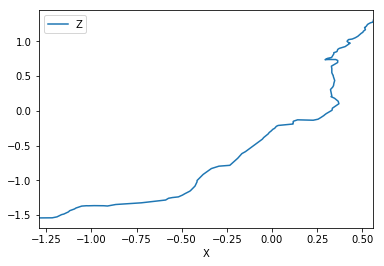

In [275]:
df7.plot(x='X', y='Z')

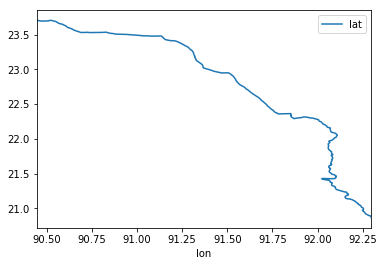

In [276]:
df[df['road']=='N1'].plot(x='lon', y='lat')

In [277]:
bmms = pd.read_excel('BMMS_overview.xlsx')

In [278]:
bmms.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate


In [279]:
bmms.rename(columns={'LRPName': 'Object Name'}, inplace=True)

In [280]:
bmms.head()

,road,km,type,Object Name,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate


In [281]:
bmms2 = bmms[bmms['road']=='N1']
bmms2.head()

,road,km,type,Object Name,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate


In [282]:
bmms2['Object Name'].duplicated().sum()

148

In [283]:
bmms3 = bmms2[['Object Name', 'length', 'width' ]]
bmms3.head()

,Object Name,length,width
0,LRP001a,11.30,19.5
1,LRP004b,6.60,35.4
2,LRP008b,394.23,NaN
3,LRP010b,6.30,12.2
4,LRP010c,6.30,12.2


In [284]:
bmms3['simple_lrp'] = bmms3['Object Name'].str[:-1]
bmms3= bmms3.drop_duplicates(subset ='simple_lrp', keep='last')
bmms3.head()

C:\Users\Bastiaan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Object Name,length,width,simple_lrp
0,LRP001a,11.3,19.5,LRP001
1,LRP004b,6.6,35.4,LRP004
7,LRP012b,6.1,20.6,LRP012
11,LRP013b,27.5,NaN,LRP013
12,LRP014a,11.9,22.4,LRP014


In [285]:
#merge the df7 with bmms3 on 'Object Name'
df8 = pd.merge(df7, bmms3, how='left', on='Object Name')
df8

,Object Class,Object Name,X,Y,Z,simple_lrp_x,length,width,simple_lrp_y
0,Source,LRPS,-1.292958,0,-1.539999,LRP,NaN,NaN,NaN
1,Bridge,LRP008b,-1.217459,0,-1.538554,LRP008,397.00,14.65,LRP008
2,Bridge,LRP012b,-1.191153,0,-1.525026,LRP012,6.10,20.60,LRP012
3,Bridge,LRP016c,-1.165292,0,-1.492277,LRP016,NaN,NaN,NaN
4,Bridge,LRP017b,-1.161764,0,-1.489888,LRP017,159.50,17.80,LRP017
5,Bridge,LRP017d,-1.158792,0,-1.487888,LRP017,NaN,NaN,NaN
6,Bridge,LRP018b,-1.153292,0,-1.484666,LRP018,NaN,NaN,NaN
7,Bridge,LRP020c,-1.138597,0,-1.467526,LRP020,NaN,NaN,NaN
8,Bridge,LRP022b,-1.129597,0,-1.456470,LRP022,NaN,NaN,NaN
9,Bridge,LRP022d,-1.127708,0,-1.453498,LRP022,NaN,NaN,NaN


In [288]:
df9 = df5[['difference', 'lrp', 'simple_lrp']]
df9.head(10)


,difference,lrp,simple_lrp
0,NaN,LRPS,LRP
2,0.418,LRP008b,LRP008
4,0.026,LRP012b,LRP012
6,0.160,LRP016c,LRP016
8,0.021,LRP017b,LRP017
10,0.030,LRP017d,LRP017
12,0.041,LRP018b,LRP018
14,0.100,LRP020c,LRP020
16,0.228,LRP022b,LRP022
18,0.122,LRP022d,LRP022


In [289]:
df10 = pd.merge(df8, df9, how='left', left_on='Object Name', right_on='lrp')
df10

,Object Class,Object Name,X,Y,Z,simple_lrp_x,length,width,simple_lrp_y,difference,lrp,simple_lrp
0,Source,LRPS,-1.292958,0,-1.539999,LRP,NaN,NaN,NaN,NaN,LRPS,LRP
1,Bridge,LRP008b,-1.217459,0,-1.538554,LRP008,397.00,14.65,LRP008,0.418,LRP008b,LRP008
2,Bridge,LRP012b,-1.191153,0,-1.525026,LRP012,6.10,20.60,LRP012,0.026,LRP012b,LRP012
3,Bridge,LRP016c,-1.165292,0,-1.492277,LRP016,NaN,NaN,NaN,0.160,LRP016c,LRP016
4,Bridge,LRP017b,-1.161764,0,-1.489888,LRP017,159.50,17.80,LRP017,0.021,LRP017b,LRP017
5,Bridge,LRP017d,-1.158792,0,-1.487888,LRP017,NaN,NaN,NaN,0.030,LRP017d,LRP017
6,Bridge,LRP018b,-1.153292,0,-1.484666,LRP018,NaN,NaN,NaN,0.041,LRP018b,LRP018
7,Bridge,LRP020c,-1.138597,0,-1.467526,LRP020,NaN,NaN,NaN,0.100,LRP020c,LRP020
8,Bridge,LRP022b,-1.129597,0,-1.456470,LRP022,NaN,NaN,NaN,0.228,LRP022b,LRP022
9,Bridge,LRP022d,-1.127708,0,-1.453498,LRP022,NaN,NaN,NaN,0.122,LRP022d,LRP022


In [197]:
df9['Object Name_x'].duplicated().sum()

35

In [ ]:
#Dataframe example (not included in assignment):

In [43]:
df1 = pd.DataFrame(np.random.randn(5,3), index=pd.date_range('01/02/2014',periods=5,freq='D'), columns=['a','b','c'] )
df1

,a,b,c
2014-01-02,-1.095440,-1.022002,-1.117231
2014-01-03,1.183982,0.907319,-0.248883
2014-01-04,1.438606,0.206159,-0.941777
2014-01-05,0.987607,0.909285,0.367632
2014-01-06,-0.930427,-0.068707,0.712051


In [57]:
df1[[True, True, True, False, False]]

,a,b,c
2014-01-02,-1.095440,-1.022002,-1.117231
2014-01-03,1.183982,0.907319,-0.248883
2014-01-04,1.438606,0.206159,-0.941777


In [60]:
df1[df1['a']>=0]

,a,b,c
2014-01-03,1.183982,0.907319,-0.248883
2014-01-04,1.438606,0.206159,-0.941777
2014-01-05,0.987607,0.909285,0.367632


In [62]:
df1.loc['2014-01-03']

a    1.183982
b    0.907319
c   -0.248883
Name: 2014-01-03 00:00:00, dtype: float64

In [63]:
df1.iloc[0]

a   -1.095440
b   -1.022002
c   -1.117231
Name: 2014-01-02 00:00:00, dtype: float64

In [64]:
df1.ix[0, 'a']

-1.0954395370460341

In [73]:
df1['a'][0]

-1.0954395370460341